In [1]:
from imports import *
from dataset import *

# model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
# tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')

# train_data, val_data = inspect_data(data)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
data = load_dataset("roneneldan/TinyStories")

In [26]:

shuffled_text = random.sample(data['validation']['text'], len(data['validation']['text']))
# np.random.shuffle(data['validation']['text'])

In [27]:
shuffled_text

['Tim and Tom are brothers. They like to play with their toys and eat snacks. But sometimes they fight over who gets what. One day, their mom makes meat for lunch. She puts two plates on the table, one for Tim and one for Tom.\n\n"Here you go, boys. Eat your meat and veggies. They are good for you," mom says.\n\nTim and Tom run to the table. They both want the bigger piece of meat. They grab the same plate and pull.\n\n"Let go! This is mine!" Tim shouts.\n\n"No, it\'s mine! I saw it first!" Tom yells.\n\nThey tug and tug until the plate falls to the floor. The meat and veggies splatter everywhere. Mom hears the noise and comes back.\n\n"What happened here?" mom asks. She is angry.\n\n"Tim is selfish! He took my meat!" Tom says.\n\n"No, Tom is selfish! He took my meat!" Tim says.\n\nMom shakes her head. She is disappointed.\n\n"Boys, boys. You should share and be nice to each other. Meat is not the most important thing. Love is. Now you have no meat and no lunch. And you have to clean u

In [28]:
val_analysis_vanilla = []
val_analysis_tokenized = []

for sample in tqdm(shuffled_text):
    # val_analysis.append(len(tokenizer))
    val_analysis_vanilla.append(len(sample.split()))
    # val_analysis_tokenized.append(np.array(tokenizer(sample, return_tensors="pt")["input_ids"]).shape[1])

100%|██████████| 21990/21990 [00:00<00:00, 189525.05it/s]


In [29]:
from collections import Counter

count_vanilla = Counter(val_analysis_vanilla)
# count_tokenized = Counter(val_analysis_tokenized)

In [30]:
# Sort dictionary by values (descending)
sorted_dict_desc = dict(sorted(count_vanilla.items(), key=lambda item: item[1], reverse=True))

print(sorted_dict_desc)


{143: 303, 142: 294, 128: 276, 133: 272, 138: 272, 130: 265, 140: 265, 137: 265, 154: 264, 139: 264, 147: 262, 135: 261, 132: 260, 145: 255, 148: 254, 141: 252, 131: 252, 146: 250, 134: 246, 136: 244, 149: 243, 152: 240, 125: 239, 150: 237, 157: 237, 155: 234, 122: 229, 129: 228, 151: 227, 161: 226, 144: 225, 153: 222, 126: 221, 127: 221, 123: 218, 160: 216, 159: 213, 163: 212, 156: 209, 121: 207, 164: 204, 120: 197, 158: 195, 124: 195, 168: 194, 162: 194, 119: 192, 169: 190, 167: 190, 165: 189, 166: 178, 117: 174, 116: 171, 118: 171, 170: 170, 172: 164, 171: 163, 176: 159, 115: 152, 173: 151, 174: 150, 178: 143, 175: 143, 114: 138, 111: 137, 112: 127, 177: 125, 113: 125, 179: 121, 110: 121, 180: 116, 105: 115, 183: 114, 109: 113, 182: 112, 107: 108, 181: 105, 186: 104, 108: 103, 190: 101, 185: 101, 184: 101, 106: 98, 188: 88, 192: 88, 187: 88, 189: 85, 195: 85, 194: 83, 193: 79, 103: 75, 101: 75, 191: 74, 198: 73, 202: 69, 196: 68, 200: 67, 104: 66, 102: 64, 201: 60, 199: 59, 99: 57, 

In [17]:
import plotly.graph_objs as go
from collections import Counter



# Get the unified set of keys from both dictionaries
all_keys = sorted(set(count_vanilla.keys()))

# Fill missing counts with 0 for both lists
y1 = [count_vanilla.get(key, 0) for key in all_keys]
# y2 = [count_tokenized.get(key, 0) for key in all_keys]

# Create two bar traces, one for each list
trace1 = go.Scatter(x=all_keys, y=y1, name='List 1 Count')
# trace2 = go.Scatter(x=all_keys, y=y2, name='List 2 Count')

# Layout configuration
layout = go.Layout(
    title="Tiny Stories Dataset average string length count",
    xaxis=dict(title='Values'),
    yaxis=dict(title='Counts'),
    barmode='group'  # 'group' places bars side-by-side
)

# Combine the traces into a figure
fig = go.Figure(data=[trace1], layout=layout)

# Show the plot
fig.show()


In [68]:
from imports import * 

# data_novel = load_dataset("alpindale/light-novels")
# data_novel = load_dataset("databricks/databricks-dolly-15k")
# data_alpaca = load_dataset("tatsu-lab/alpaca")
# data_platypus = load_dataset("YashaP/Summarisation_dataset")
data_story = load_dataset("Lots-of-LoRAs/task298_storycloze_correct_end_classification")

In [69]:
data_story['valid']['input']

["Definition: In this task, you're given four sentences of a story written in natural language, and one last sentence (Sentence5). Your job is to classify whether the last sentence completes the rest of the story coherently or not by providing 'Yes' or 'No'.\n\nPositive Example 1 -\nInput: Sentence1: Rick grew up in a troubled household. Sentence2: He never found good support in family, and turned to gangs. Sentence3: It wasn't long before Rick got shot in a robbery. Sentence4: The incident caused him to turn a new leaf. \n Sentence5: He is happy now.\nOutput: Yes\n\nPositive Example 2 -\nInput: Sentence1: Laverne needs to prepare something for her friend's party. Sentence2: She decides to bake a batch of brownies. Sentence3: She chooses a recipe and follows it closely. Sentence4: Laverne tests one of the brownies to make sure it is delicious. \n Sentence5: Laverne doesn't go to her friend's party.\nOutput: No\n\nNegative Example 1 -\nInput: Sentence1: Rick grew up in a troubled househ

In [70]:
data_novel_analysis = []
data_novel_analysis_tokenized = []

# for sample in tqdm(data_alpaca['train']['instruction']):
for sample in tqdm(data_story['train']['input']):
    data_novel_analysis.append(len(sample.split()))
    # data_novel_analysis_tokenized.append(np.array(tokenizer(sample['text'], return_tensors="pt")["input_ids"]).shape[1])

100%|██████████| 3015/3015 [00:00<00:00, 156761.91it/s]


In [71]:
from collections import Counter

count_vanilla = Counter(data_novel_analysis)
# count_tokenized = Counter(data_novel_analysis_tokenized)
sorted_dict_desc= dict(sorted(count_vanilla.items(), key=lambda item: item[1], reverse=True))

print(sorted_dict_desc)

# count = 0

# for k, v in sorted_dict_desc.items():
#     if k > 1000 and k < 1500:
#         count+=1
        
# print(count)

{319: 172, 315: 165, 317: 161, 316: 157, 318: 152, 314: 151, 320: 149, 321: 147, 313: 143, 312: 138, 323: 116, 324: 116, 310: 109, 311: 108, 322: 101, 325: 98, 309: 88, 326: 88, 308: 82, 307: 66, 327: 58, 306: 52, 305: 49, 328: 45, 329: 45, 304: 37, 303: 33, 331: 29, 330: 28, 302: 25, 300: 20, 301: 19, 332: 15, 334: 12, 333: 7, 335: 7, 336: 6, 297: 3, 299: 3, 298: 3, 337: 3, 295: 2, 338: 2, 294: 2, 339: 1, 296: 1, 340: 1}


In [72]:
import plotly.graph_objs as go
from collections import Counter

# Using your count_vanilla data
keys = list(count_vanilla.keys())
values = list(count_vanilla.values())

# Create a line plot
trace = go.Scatter(x=keys, y=values, mode='lines', line=dict(color='blue'))

# Layout configuration
layout = go.Layout(
    title="Story Dataset average string length count",
    xaxis=dict(title='Values'),
    yaxis=dict(title='Counts')
)

# Combine the trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()

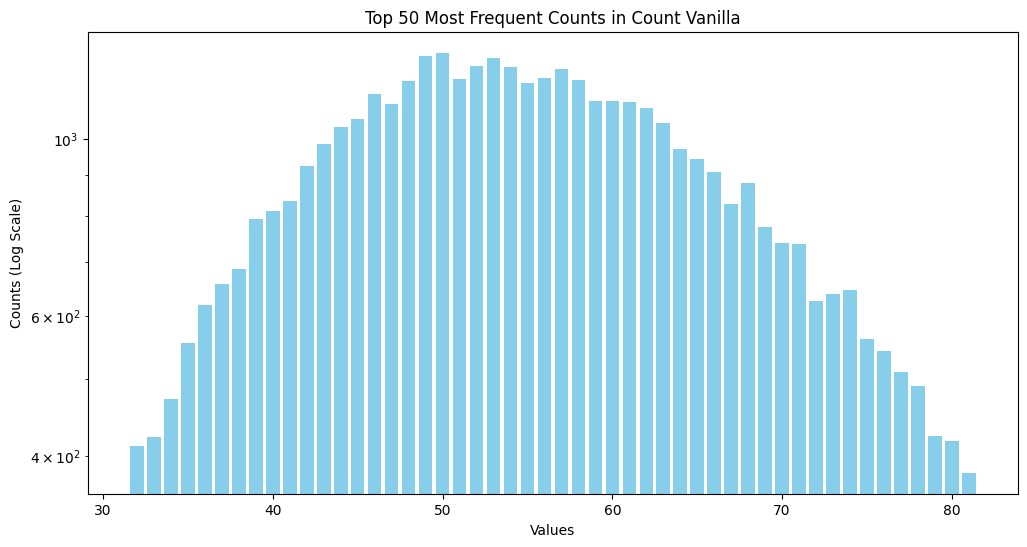

In [16]:


# Get the top 50 most frequent items
top_50 = count_vanilla.most_common(50)

# Separate the keys (values) and counts
keys, values = zip(*top_50)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')

# Add titles and labels
plt.title('Top 50 Most Frequent Counts in Count Vanilla')
plt.xlabel('Values')
plt.ylabel('Counts (Log Scale)')

# Apply logarithmic scaling to y-axis
plt.yscale('log')

# Display the plot
plt.show()

plt.show()


In [12]:
count_vanilla

Counter({0: 1902055,
         2: 224691,
         50: 133088,
         4: 114078,
         11: 108547,
         1: 79518,
         9: 73288,
         12: 62661,
         10: 57279,
         6: 49811,
         13: 45133,
         8: 45094,
         44: 44997,
         64: 44684,
         32: 43380,
         38: 43059,
         31: 42872,
         35: 42802,
         33: 42797,
         39: 42789,
         34: 42789,
         29: 42468,
         37: 42342,
         28: 42143,
         40: 41880,
         22: 41778,
         36: 41754,
         41: 41399,
         23: 41228,
         19: 41116,
         27: 40961,
         49: 40939,
         21: 40871,
         30: 40839,
         26: 40724,
         42: 40542,
         47: 40387,
         15: 40336,
         14: 40263,
         25: 40212,
         48: 40109,
         46: 40062,
         7: 40013,
         43: 39726,
         17: 39022,
         45: 38947,
         24: 38788,
         53: 38705,
         51: 38614,
         16: 38440,
  